# Week 5: Probability Distributions

In [1]:
# Loading the libraries
import numpy as np
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Days 2 and 3: Some Special Probability Distributions

* Previously we have introduced the concept of a **random variable**, and the concept of **probability distribution** (via the *probability mass function* /pmf/ and *probability densiti function* /pdf/)
* Now we talk about some probability distributions that frequently appear in the study of statistics and machine learning 

### Constucting Random Variables from scratch using `scipy.stats`
* First order of business will be to learn how to construct a random variable from scratch using only values and probabilities
* To illustrate the process, we will use two examples from before. The data is provided below

### Example 1: Discrete Variables
Recall the example about supplying refurbished computers to a client. The random variable $L$ - total loss - is given in the following table.

| $k$ | \$0 | \$100 | \$1000|
|:---:|:---:|:-----:|:-----:|
|$P(L=k)$|0.528 | 0.416 | 0.056|

* Construct the variable `comp_loss` as a `scipy.stats` object
* Visualize its distribution on a bar graph
* Calculate: $E(L)$, $Var(L)$, $\sigma_L$

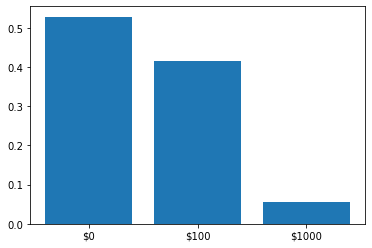

E(L) =  97.6
Var(L) =  50634.240000000005
sigma_L =  225.02053239649044


In [2]:
# Use scipy.stats.rv_discrete()
vals = [0, 100, 1000]
probs = [0.528, 0.416, 0.056]

comp_loss = stats.rv_discrete(values=(vals, probs))

plt.figure()
plt.bar(['$0', '$100', '$1000'], comp_loss.pmf(vals))
plt.show()

print('E(L) = ', comp_loss.mean())
print('Var(L) = ', comp_loss.var())
print('sigma_L = ', comp_loss.std())

### Example 2: Discrete Variables
Construct a `scipy.stats.rv_discrete` object named `uni_rv` for a random variable $V$ which takes only the integer values $V = \{ -1, 0, 1, 2, 3 \}$, all of them with equal probability (this is the discrete uniform distribution on the set $V$. Then:
* Visualize its distribution on a bar graph
* Calculate: $E(V)$, $Var(V)$, $\sigma_V$

E(V) =  1.0
Var(V) =  2.0
sigma_V =  1.4142135623730951


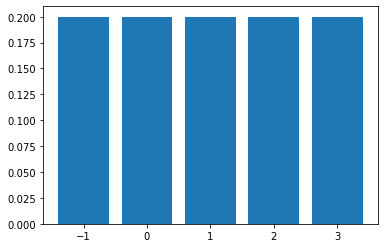

In [3]:
# Use scipy.stats.rv_discrete()
vals = np.array([-1, 0, 1, 2, 3])
probs = np.ones(vals.size)/(vals.size)

uni_rv = stats.rv_discrete(values = (vals, probs))

plt.figure()
plt.bar(vals, uni_rv.pmf(vals))


print('E(V) = ', uni_rv.mean())
print('Var(V) = ', uni_rv.var())
print('sigma_V = ', uni_rv.std())

### Example 3: Continuous Variables
Recall the continuous random variable $X$ given in **Example 4** from the previous lecture. $X$ is a random variable such that $X \in [0, 1]$, and the pdf is given by
\begin{equation}f(x) = \frac{15}{2} x^2 (1-x^2)\end{equation}
* Construct a `scipy.stats.rv_continuous` object named `x_rv` for a random variable $X$
* Visualize $X$'s pdf
* Find the probability $P(0.5 \leqslant X \leqslant 0.8)$
* Calculate $E(X)$ and $\sigma_X$

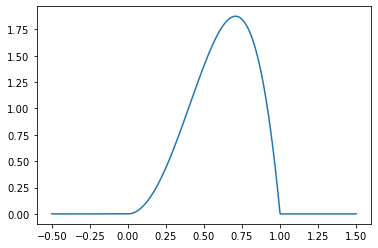

P(0.5 <= X <= 0.8) =  0.5228550000000002
E(X) =  0.6250000000002507
sigma_X =  0.19479843061696456


In [4]:
# use scipy.stats.rv_continuous()
# first build a generator class with custom _pdf()
class x_rv_generator(stats.rv_continuous):
    def _pdf(self, x):
        return 7.5 * x**2 * ( 1- x**2)

x_rv = x_rv_generator(a= 0, b= 1)

xs = np.linspace(-0.5, 1.5, 1000)
plt.figure()
plt.plot(xs,x_rv.pdf(xs) )
plt.show()

print('P(0.5 <= X <= 0.8) = ',  x_rv.cdf(0.8) - x_rv.cdf(0.5))
print('E(X) = ', x_rv.mean())
print('sigma_X = ', x_rv.std())

### Example 4: Continuous Variables
$Y$ is a random variable such that $Y \in [0, \pi]$, and the pdf is given by
\begin{equation}f(y) = \frac{2\cdot \sin^2 x}{\pi}\end{equation}
* Construct a `scipy.stats.rv_continuous` object named `y_rv` for a random variable $Y$
* Visualize $Y$'s pdf
* Find the probability $P(0.5 \leqslant Y \leqslant 0.8)$ and $P\left(\frac{\pi}{3} \leqslant Y \leqslant \frac{3\pi}{4}\right)$
* Calculate $E(Y)$ and $\sigma_Y$

**Suggestion** Try this with other values. 


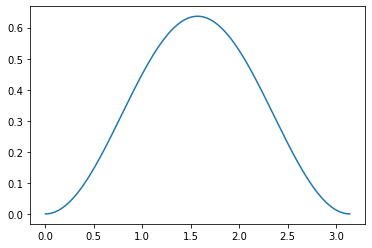

P(0.5 <= Y <= 0.8) =  0.07033015264748757
P(pi/3 <= Y <= 3pi/4) =  0.7136538336140101
E(Y) =  1.5707963267948966
sigma_Y =  0.5678618083866199


In [5]:
# use scipy.stats.rv_continuous() and np.pi
class y_rv_generator(stats.rv_continuous):
    def _pdf(self, x):
        return 2*np.sin(x)**2/np.pi

y_rv = y_rv_generator(a=0, b=np.pi)

xs = np.linspace(0, np.pi, 1000)
plt.figure()
plt.plot(xs, y_rv.pdf(xs))
plt.show()

print('P(0.5 <= Y <= 0.8) = ', y_rv.cdf(0.8) - y_rv.cdf(0.5))
print('P(pi/3 <= Y <= 3pi/4) = ', y_rv.cdf(3*np.pi/4) - y_rv.cdf(np.pi/3))
print('E(Y) = ', y_rv.mean())
print('sigma_Y = ', y_rv.std())

### Binomial Distribution
Recall the example with the couple who planned on having three children. Problems of this and similar nature appear quite frequently. The undelying commonalities for this class of problems are:
* There is a fixed, predetermined number of independent trials/observations, usually labeled by $n$
* All trials have only two outcomes: either *success* or *failure*
* The probability of observing a success in each of the trials is fixed in all trials, and is usually labeled by $p$

These three properties describe what is known as **Binomial Setting** which can universally be described using a single probability distribution function called **Binomial Distribution**. The binomial distribution has two *parameters*: the number of trials $n$, and the probability of success in each trial, $p$. If a random variable $X$ **counts the number of successes in the series of trials**, then it follows a binomial distribution with parameters $n$ and $p$, the we write:
\begin{equation} X \sim \mathcal{B}(n, p) \end{equation}
For such a discrete random variable $X \in \{0, 1, \ldots, n  \}$ and the pmf is given by:
\begin{equation} P(X = k) = {n \choose k}p^k (1-p)^{n-k} \end{equation}
where ${n \choose k} = \frac{n!}{k! ~ (n-k)!}$ is called **binomial coefficient** (read: "$n$ choose $k$") and $!$ after a number denotes the factoral of the number, e.g. $5! = 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1$. The binomial coefficient tells you in how many ways you can choose a group of size $k$ if your pool of choices is of size $n$.

### Example 5: Binomial Distribution
Each offspring hatched from a particular type of reptile has probability 0.2 of surviving for at least one week. If 6 offspring of these reptiles are hatched, find the probability that:
* Exactly 2 of the 6 will survive for at least one week
* At most 2 of the 6 will survive for at least one week
* At least 3 of the 6 will survive for at least one week

In [6]:
# Use scipy.stats.binom()
reptile_rv = stats.binom(n=6, p=0.2)

# Exactly 2 of the 6 will survive for at least one week
prob_exactly_2 = reptile_rv.pmf(2)
print('P(X=2) = ', prob_exactly_2)

# At most 2 of the 6 will survive for at least one week
prob_at_most_2 = reptile_rv.pmf(0)+reptile_rv.pmf(1)+reptile_rv.pmf(2) 
          #no reptile survives  + #1 reptile survives +  #2 reptiles survive
                   
print('P(X<=2) = ', prob_at_most_2)



# At least 3 of the 6 will survive for at least one week
prob_at_least_3 = reptile_rv.pmf(3)+reptile_rv.pmf(4)+reptile_rv.pmf(5) +reptile_rv.pmf(6) 
print('P(X>=3) = ', prob_at_least_3)


P(X=2) =  0.24576000000000003
P(X<=2) =  0.9011200000000001
P(X>=3) =  0.09888000000000007


### Example 6: Binomial Distribution
The Census Bureau's Current Population Survey shows 28% of individuals, ages 25 and older, have completed four years of college (this is 2006 data). For a random sample of 15 individuals, ages 25 and older:
* What is the probability 4 will have completed four years of college?
* What is the probability 3 or more will have completed four years of college?

In [7]:
college_rv = stats.binom(n=15, p=0.28)

print('X = # of people in the sample who have completed college')
print('X ~ B(15, 0.28)')
#Probability that 4 will have completed four years of college:
print('P(X=4)= ', college_rv.pmf(4))

#probability 3 or more will have completed four years of college 
print('P(X>=3)= ', 1- college_rv.cdf(2))   # 1-P(X<=2) = P(X>=3)

#probability 5 or more will have completed four years of college 
print('P(X>=5)= ', 1- college_rv.cdf(4))   # 1-P(X<=4) = P(X>=5)


#probability 10 or more will have completed four years of college 
print('P(X>=10)= ', 1- college_rv.cdf(9))   # 1-P(X<=9) = P(X>=10)

X = # of people in the sample who have completed college
X ~ B(15, 0.28)
P(X=4)=  0.2261633547176576
P(X>=3)=  0.8354638847772569
P(X>=5)=  0.41544622601589354
P(X>=10)=  0.0020684757260214237


### Poisson Distribution
The setting is as such: we are counting *successes* happening through time or space; for example: the total number of traffic accidents, per week, at some intersection, or the total number of typos per page in some book. The undelying commonalities for the class are:
* The number of *successes* is described as *rates* -- mean number of successes per "unit"
* Observations/trials are independent
* The mean number of *successes* per unit is scalable

The **Poisson Distribution** describes the distribution of probabilities under these conditions. To fully define the Poisson distribution, we need only one parameter: the **mean number of *successes*** per unit, usually labeled by $\lambda$. If a random variable $X$ counts the number of successes in this setting, then it follows a Poisson distribution with mean $\lambda$, and we write:
\begin{equation} X \sim \mathcal{Po}(\lambda) \end{equation}
For such a discrete random variable $X \in \{0, 1, 2, \ldots  \}$ and the pmf is given by:
\begin{equation} P(X = k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda} \end{equation}
where $e = 2.7172\ldots$ is Euler's number, the base of the natural exponential/logarithmic function.

### Example 7: Poisson Distribution
Airline passengers arrive randomly and independently at the passenger-screening facility at a major international airport. The mean arrival rate is 10 passengers per minute.
* Visualize the distirbution on the range $\{ 0, 1, \ldots, 35 \}$

Then calculate the probability that there are:
* no arrivals in a one-minute period.
* three or fewer passengers arrive in a one-minute period.
* no arrivals in a 15-second period.
* at least 27 arrivals in a two-minute period.

X = # of people arriving at the passenger-screeing facility in one minute
X ~ Po(10)
P(X = 0) =  4.5399929762484854e-05
P(X <= 3) =  0.010336050675925726
P(X_15s = 0) =  0.0820849986238988
P(X_2m >=27 ) =  0.07788678109622527


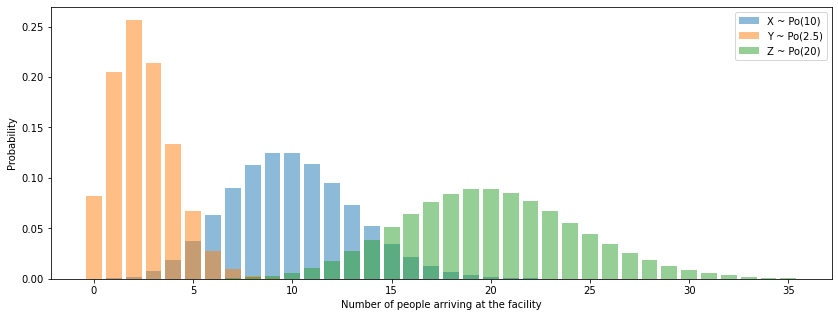

In [8]:
# use scipy.stats.poisson()
# Define lambda
lmbd = 10

# Define the 1-min distribution
poisson_rv_1min = stats.poisson(lmbd)

print('X = # of people arriving at the passenger-screeing facility in one minute')
print('X ~ Po(10)')
# no arrivals in a one-minute period.
print('P(X = 0) = ', poisson_rv_1min.pmf(0))

#three or fewer passengers arrive in a one-minute period.

print('P(X <= 3) = ', poisson_rv_1min.cdf(3))

# no arrivals in a 15-second period.
poisson_rv_15sec = stats.poisson(lmbd/4)
print('P(X_15s = 0) = ', poisson_rv_15sec.pmf(0))

#at least seven arrivals in a two-minute period.
poisson_rv_2min = stats.poisson(lmbd*2)
print('P(X_2m >=27 ) = ', 1- poisson_rv_2min.cdf(26))



#visualize
ks = np.arange(0, 36)
probs = poisson_rv_1min.pmf(ks)
plt.figure(figsize=(14,5))
plt.bar(ks, poisson_rv_1min.pmf(ks), alpha=0.5, label = 'X ~ Po(10)')
plt.bar(ks, poisson_rv_15sec.pmf(ks), alpha=0.5, label = 'Y ~ Po(2.5)')
plt.bar(ks, poisson_rv_2min.pmf(ks), alpha=0.5, label = 'Z ~ Po(20)')
plt.xlabel('Number of people arriving at the facility')
plt.ylabel('Probability')
plt.legend()
plt.show()

Exercise 7b: Calculate the probability to have exactly 3 or exactly  7 people pass at the facility within a 30 second interval.

In [9]:
lmbd = 10    #for a minute
poisson_rv_30sec = stats.poisson(lmbd/2)
print('P([X_30sec = 3] OR  [X_30sec = 7]) = P([X_30sec = 3])+ P([X_30sec = 7]) = ', poisson_rv_30sec.pmf(3)+poisson_rv_30sec.pmf(7) )


P([X_30sec = 3] OR  [X_30sec = 7]) = P([X_30sec = 3])+ P([X_30sec = 7]) =  0.24481875877133447


### Example 8: Poisson Distribution
An investigation into road quality establishes that major road defects, one month after asphalt-resurfacing, occur at the average rate of 2 defects per kilometer of road. Calculate the probability that there are:
* no major defects in a particular one-kilometer section of the road
* at least three major defects in a particular one-mile section of the road (1 mile = 1.609 km)

In [10]:
# use scipy.stats.poisson()


### Normal Distribution
The **Normal Distribution** goes by many names, and most people have heard about it. It is also known as **Gaussian Distribution** or **Bell-Curve**. The normal distribution has two parameters: the *location* parameter which is defined by the **mean** $\mu$ of the distribution (and is the most likely outcome), and the *scale* parameter which is defined by the **variance** $\sigma^2$ or **standard deviation** $\sigma$ of the distribution (which determines the horizontal stretch of the distribution). If a random variable $X$ follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, we write:
\begin{equation} X \sim \mathcal{N}(\mu, \sigma) \end{equation}
For any such random variable, $X \in (-\infty, \infty)$ and the pdf is given by:
\begin{equation} f(x \mid \mu, \sigma) = \displaystyle \frac{1}{\sqrt{2\pi}\cdot \sigma}~\exp\left( {-\frac{1}{2} ~ \left( \frac{x - \mu}{\sigma} \right)^2} \right) \end{equation}

Every Normal distribution has a unique definiing property known as **68-95-99.7 Rule** or **Empirical Rule** which relates the mean, the standard deviation, and the normal probabilities:
\begin{equation}
\begin{array}{rcl}
P \big(\mu - \sigma \leqslant X \leqslant \mu + \sigma \big) &\approx& 0.68\\
P \big(\mu - 2\sigma \leqslant X \leqslant \mu + 2\sigma \big) &\approx& 0.95\\
P \big(\mu - 3\sigma \leqslant X \leqslant \mu + 3\sigma \big) &\approx& 0.997
\end{array}
\end{equation}
In other words: only the outcomes which are **within 3 standard deviations of the mean** are relevant, all other outcomes occur so rarely that they can, most frequently, be disregarded.

### Example 9: Normal Distribution
The weights of babies born at Prince Louis Maternity Hospital last year averaged $\mu = 3.0$ kg with a standard deviation of $\sigma = 200$ grams.
* Visualize the distribution in the range $[\mu - 4\sigma, \mu + 4\sigma]$
* What is the probability that a randomly selected baby born at the hospital weighs less than 3.2 kg?
* If there were 545 babies born at this hospital last year, estimate the number of babies that weighed between 2.8 kg and 3.4 kg
* Find the weight $w$ such that 40% of babies weigh less than $w$

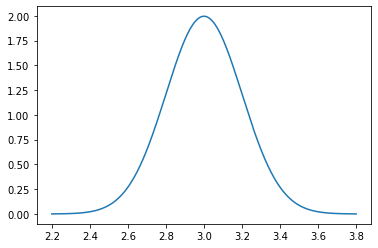

P(X<=3.2) 0.8413447460685431
P(2.8<X<3.4) 0.8185946141203639
446.13406469559834
P(X<w) =0.4 for w =  2.94933057937284


In [11]:
# use scipy.stats.norm()
# Define mu and sigma
mu = 3
sigma =  0.2 #in kilograms!
weights_rv = stats.norm(mu, sigma)

# Visualize the distribution
xs = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
plt.figure()
plt.plot(xs, weights_rv.pdf(xs))
plt.show()



# What is the probability that a randomly selected baby born at the hospital weighs less than 3.2 kg?
print('P(X<=3.2)', weights_rv.cdf(3.2))


# If there were 545 babies born at this hospital last year, estimate the
# number of babies that weighed between 2.8 kg and 3.4 kg
print('P(2.8<X<3.4)', weights_rv.cdf(3.4) - weights_rv.cdf(2.8))
print((weights_rv.cdf(3.4) - weights_rv.cdf(2.8))*545)

#Find the weight w such that 40% of babies weigh less than w
print('P(X<w) =0.4 for w = ', weights_rv.ppf(0.4))

### Example 10: Normal Distribution
The heights of a group of students are normally distributed with a mean of 160 cm and a standard deviation of 20 cm.
* A student is chosen at random. Find the probability that the student’s height is greater than 180 cm.
* In this group of students, 11.9% have heights less than $d$ cm. Find the value of $d$.

In [12]:
# use scipy.stats.norm()
# Define mu and sigma
mu = 1.6
sigma =  0.2 #in kilograms!
heights_rv = stats.norm(mu, sigma)
print('P(X>1.80) = 1- P(X<=1.80) = ', 1- heights_rv.cdf(1.8))
print('P(X<w) =0.119 for w = ', heights_rv.ppf(0.119))

P(X>1.80) = 1- P(X<=1.80) =  0.15865525393145707
P(X<w) =0.119 for w =  1.3639998919304543
